# <span style="color:blue"> TP de Aprendizagem de Máquina </span>
#### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [8]:
# Build the model.
#unity = 50
#learning_rate = 0.5
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=2)
#print("Training Error: %.2f%%" % (100-scores[1]*100))

## <span style="color:red">Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch</span>
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
### 2 - 

In [9]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient):
    lr = learning_rate
    un = unity
    
    if gradient == 'gd':
        inputsGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD.append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD.append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10.append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50.append(100-scores[1]*100)

In [10]:
inputsGD = []
outputsGD = []
inputsSGD = []
outputsSGD = []
inputsMiniBatch10 = []
outputsMiniBatch10 = []
inputsMiniBatch50 = []
outputsMiniBatch50 = []

In [11]:
def clear_arrays():
    del inputsGD[:]
    del outputsGD[:]
    del inputsSGD[:]
    del outputsSGD[:]
    del inputsMiniBatch10[:]
    del outputsMiniBatch10[:]
    del inputsMiniBatch50[:]
    del outputsMiniBatch50[:]

In [12]:
# GD, lr = 0.5, un = 25.
use_model(0.5, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 166us/step - loss: 2.3074 - acc: 0.0932 - val_loss: 2.3034 - val_acc: 0.0918
90.82


In [13]:
# GD, lr = 1, un = 25.
use_model(1, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 135us/step - loss: 2.3053 - acc: 0.1316 - val_loss: 2.2977 - val_acc: 0.1142
88.58


In [14]:
# GD, lr = 10, un = 25.
use_model(10, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 151us/step - loss: 2.3082 - acc: 0.0920 - val_loss: 2.6255 - val_acc: 0.1000
90.0


In [15]:
# SGD, lr = 0.5, un = 25.
use_model(0.5, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 50s 10ms/step - loss: 2.8682 - acc: 0.0986 - val_loss: 3.0502 - val_acc: 0.1000
90.0


In [16]:
# SGD, lr = 1, un = 25.
use_model(1, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 39s 8ms/step - loss: 2.5369 - acc: 0.1050 - val_loss: 2.6668 - val_acc: 0.1060
89.4


In [17]:
# SGD, lr = 10, un = 25.
use_model(10, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 39s 8ms/step - loss: 14.4423 - acc: 0.1038 - val_loss: 14.4418 - val_acc: 0.1040
89.6


In [18]:
# MB10, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 6s 1ms/step - loss: 1.6280 - acc: 0.4012 - val_loss: 0.7492 - val_acc: 0.7566
24.33999999999999


In [19]:
# MB10, lr = 1, un = 25.
use_model(1, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 1.9382 - acc: 0.2780 - val_loss: 1.0982 - val_acc: 0.5630
43.7


In [20]:
# MB10, lr = 10, un = 25
use_model(10, 25, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 6s 1ms/step - loss: 7.5823 - acc: 0.1008 - val_loss: 6.5960 - val_acc: 0.1142
88.58


In [21]:
# MB50, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 481us/step - loss: 2.2156 - acc: 0.1914 - val_loss: 1.8968 - val_acc: 0.2942
70.58


In [22]:
# MB50, lr = 1, un = 25.
use_model(1, 25, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 411us/step - loss: 2.2536 - acc: 0.1616 - val_loss: 2.0213 - val_acc: 0.1894
81.06


In [23]:
# MB50, lr = 10, un = 25.
use_model(10, 25, 'mb50') 

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 345us/step - loss: 2.5319 - acc: 0.1008 - val_loss: 2.3935 - val_acc: 0.1024
89.76


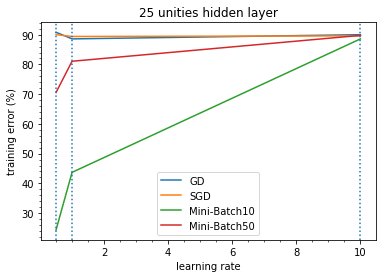

In [24]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [25]:
# Limpar os arrays para testar outro features.
clear_arrays()

In [26]:
# GD, lr = 0.5, un = 50.
use_model(0.5, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 191us/step - loss: 2.3230 - acc: 0.1222 - val_loss: 2.3015 - val_acc: 0.1142
88.58


In [27]:
# GD, lr = 1, un = 50.
use_model(1, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 178us/step - loss: 2.3168 - acc: 0.0924 - val_loss: 2.3001 - val_acc: 0.1142
88.58


In [28]:
# GD, lr = 1, un = 50.
use_model(10, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 189us/step - loss: 2.3130 - acc: 0.1142 - val_loss: 4.0087 - val_acc: 0.1040
89.6


In [29]:
# SGD, lr = 0.5, un = 50.
use_model(0.5, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 44s 9ms/step - loss: 14.5417 - acc: 0.0976 - val_loss: 14.5417 - val_acc: 0.0978
90.22


In [30]:
# SGD, lr = 1, un = 50.
use_model(1, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6288 - acc: 0.0922 - val_loss: 14.6288 - val_acc: 0.0924
90.76


In [31]:
# SGD, lr = 10, un = 50.
use_model(10, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 40s 8ms/step - loss: 14.2779 - acc: 0.1140 - val_loss: 14.2774 - val_acc: 0.1142
88.58


In [32]:
# MB10, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 1.5726 - acc: 0.4184 - val_loss: 0.7773 - val_acc: 0.7400
26.0


In [33]:
# MB10, lr = 1, un = 50.
use_model(1, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 10s 2ms/step - loss: 4.6257 - acc: 0.0948 - val_loss: 3.8837 - val_acc: 0.1142
88.58


In [34]:
# MB10, lr = 10, un = 50.
use_model(10, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 14.4397 - acc: 0.1022 - val_loss: 14.4676 - val_acc: 0.1024
89.76


In [35]:
# MB50, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 523us/step - loss: 2.1810 - acc: 0.1994 - val_loss: 1.9169 - val_acc: 0.2222
77.78


In [36]:
# MB50, lr = 1, un = 50.
use_model(1, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 646us/step - loss: 12.7125 - acc: 0.0992 - val_loss: 14.4676 - val_acc: 0.1024
89.76


In [37]:
# MB50, lr = 10, un = 50.
use_model(10, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 528us/step - loss: 14.3810 - acc: 0.0968 - val_loss: 14.5417 - val_acc: 0.0978
90.22


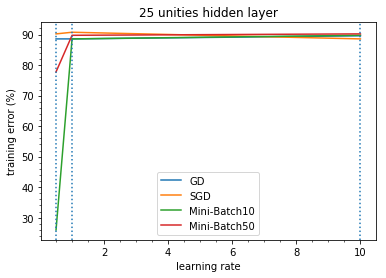

In [38]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [39]:
# Limpar os arrays para testar outro features.
clear_arrays()

In [40]:
# GD, lr = 0.5, un = 100.
use_model(0.5, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 279us/step - loss: 2.3193 - acc: 0.1000 - val_loss: 2.3048 - val_acc: 0.1142
88.58


In [41]:
# GD, lr = 1, un = 100.
use_model(1, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 261us/step - loss: 2.3204 - acc: 0.0984 - val_loss: 2.3656 - val_acc: 0.1024
89.76


In [42]:
# GD, lr = 1, un = 100.
use_model(10, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 316us/step - loss: 2.3297 - acc: 0.1024 - val_loss: 6.3881 - val_acc: 0.1266
87.34


In [43]:
# SGD, lr = 0.5, un = 100.
use_model(0.5, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 50s 10ms/step - loss: 2.6312 - acc: 0.2886 - val_loss: 3.6170 - val_acc: 0.3166
68.34


In [44]:
# SGD, lr = 1, un = 100.
use_model(1, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 38s 8ms/step - loss: 14.5067 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
90.0


In [45]:
# SGD, lr = 10, un = 100.
use_model(10, 100, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 41s 8ms/step - loss: 14.5067 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
90.0


In [46]:
# MB10, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 6s 1ms/step - loss: 1.8022 - acc: 0.3530 - val_loss: 0.7165 - val_acc: 0.7588
24.11999999999999


In [47]:
# MB10, lr = 1, un = 100.
use_model(1, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 6s 1ms/step - loss: 1.8143 - acc: 0.3192 - val_loss: 0.7941 - val_acc: 0.7200
28.0


In [48]:
# MB10, lr = 10, un = 100.
use_model(10, 100, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 6s 1ms/step - loss: 14.2471 - acc: 0.1144 - val_loss: 14.2774 - val_acc: 0.1142
88.58


In [49]:
# MB50, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 422us/step - loss: 2.1637 - acc: 0.2180 - val_loss: 1.5612 - val_acc: 0.5722
42.779999999999994


In [50]:
# MB50, lr = 1, un = 100.
use_model(1, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 447us/step - loss: 2.1621 - acc: 0.2032 - val_loss: 1.6734 - val_acc: 0.4186
58.14


In [51]:
# MB50, lr = 10, un = 100.
use_model(10, 100, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 448us/step - loss: 2.7455 - acc: 0.1128 - val_loss: 2.3703 - val_acc: 0.0920
90.8


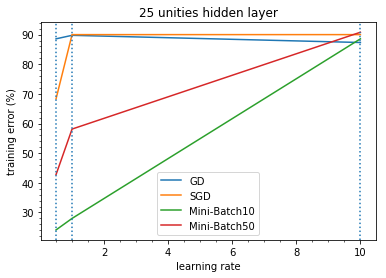

In [52]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [53]:
# Limpar os arrays para testar outro features.
clear_arrays()